# Języki skryptowe - Python
## Wykład 5

---

* przestrzenie nazw
* moduły
* błędy
* operacje na plikach

## Nazwy zmiennych

---

In [1]:
zmienna = 10 # zmienna wskazuje na int

print(zmienna)

zmienna = "Hello World!" # zmienna wskazuje na str

print(zmienna)

def funkcja(zmienna):
    print("Jestem funkcją. {}".format(zmienna))
    
zmienna = funkcja # zmienna wskazuje na funkcje

zmienna("Hello")
funkcja("Hello")

10
Hello World!
Jestem funkcją. Hello
Jestem funkcją. Hello


## Niebezpieczne nadpisania

---

In [2]:
def moja_nazwa(): # moja_nazwa wskazuje na funkcję
    print("Jestem funkcją.")
    
def moja_nazwa(): # moja_nazwa wskazuje inną funkcję
    print("Jestem nową funkcją.")
    
moja_nazwa()

Jestem nową funkcją.


In [3]:
moja_nazwa = 10 # moja_nazwa wskazuje na int 

moja_nazwa() # TypeError: 'int' object is not callable

TypeError: 'int' object is not callable

## Moduły - *import* ...

---

In [4]:
import math

def sin(x):
    """Zwraca x."""
    return x

In [5]:
math.sin(math.pi / 2) # wywołanie [moduł].[funkcja]

1.0

In [6]:
sin(math.pi / 2) # wywołanie [funkcja]

1.5707963267948966

## Moduły - *from ... import ...*

---

In [9]:
from math import sin

print(sin(math.pi / 2)) # wywołanie funkcji sin z modułu math

def sin(x): # nadpisuje sin z math
    """Zwraca x."""
    return x

print(sin(math.pi / 2)) # wywołanie funkcji sin

1.0
1.5707963267948966


In [10]:
def sin(x):
    """Zwraca x."""
    return x

from math import sin # nadpisuje sin

sin(math.pi / 2) # wywołanie math.sin

1.0

## Przestrzenie nazw

---

* abstrakcyjna przestrzeń przechowująca nazwy
* np. przestrzeń nazw wbudowanych

In [11]:
print(dir(__builtin__)[-72:])

['all', 'any', 'ascii', 'bin', 'bool', 'breakpoint', 'bytearray', 'bytes', 'callable', 'chr', 'classmethod', 'compile', 'complex', 'copyright', 'credits', 'delattr', 'dict', 'dir', 'display', 'divmod', 'enumerate', 'eval', 'exec', 'filter', 'float', 'format', 'frozenset', 'get_ipython', 'getattr', 'globals', 'hasattr', 'hash', 'help', 'hex', 'id', 'input', 'int', 'isinstance', 'issubclass', 'iter', 'len', 'license', 'list', 'locals', 'map', 'max', 'memoryview', 'min', 'next', 'object', 'oct', 'open', 'ord', 'pow', 'print', 'property', 'range', 'repr', 'reversed', 'round', 'set', 'setattr', 'slice', 'sorted', 'staticmethod', 'str', 'sum', 'super', 'tuple', 'type', 'vars', 'zip']


## Uwaga: nadpisać można wszystko

---

In [12]:
slownik = dict(x=1, y=2)

print(slownik)

{'x': 1, 'y': 2}


In [13]:
def dict(x, y): # nazwy wbudowane też można nadpisać
    return x, y

slownik = dict(x=1, y=2)

print(slownik)

(1, 2)


In [14]:
# usuń zmienne sesji jupyter
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


## Przestrzeń nazw lokalnych

---

* zmienne zdefiniowane wewnątrz funkcji (niedostępne poza nią)

In [15]:
def funkcja():             # zmienne lokalne dostępne
    zmienna_lokalna = 1    # są tylko wewnątrz funkcji
    return zmienna_lokalna # w której zostały zdefiniowane

print("zmienna_lokalna =", zmienna_lokalna)

NameError: name 'zmienna_lokalna' is not defined

## Przestrzeń nazw globalnych

---

* dostępne w całym module (pliku)

In [16]:
zmienna_globalna = "Python"

def funkcja():
    return zmienna_globalna

# wewnątrz funkcji zmienne globalne są dostępne
funkcja()

'Python'

## Zmienne lokalne nadpisują globalne

---

In [17]:
zmienna_globalna = "Python"

def funkcja():
    zmienna_globalna = "Nowy Python" # lokalna zmienna_globalna
    print("in funkcja:", zmienna_globalna)

funkcja()

print("outside funkcja:", zmienna_globalna) # globalna bez zmian

in funkcja: Nowy Python
outside funkcja: Python


## Albo *global* albo *local*

---

In [18]:
zmienna_globalna = "Python"

def funkcja():
    print("in funkcja:", zmienna_globalna) # globalna?
    zmienna_globalna = "Nowy Python"
    print("in funkcja:", zmienna_globalna) # lokalna?

funkcja() # UnboundLocalError: local variable 'zmienna_globalna'
          # referenced before assignment

UnboundLocalError: local variable 'zmienna_globalna' referenced before assignment

## Kolejność przestrzeni

---

* nazwy lokalne, potem globalne, na końcu wbudowane

In [19]:
list = tuple # zmienna globalna nadpisuje wbudowane list
dict = float # zmienna globalna nadpisuje wbudowane dict

print("type(list()) =", type(list()))
print("type(dict()) =", type(dict()))

def funkcja():
    dict = int # zmienna lokalna nadpisuje globalne dict
    print("Wewnątrz funkcji:")
    print("\ttype(dict()) =", type(dict())) # lokalna
    print("\ttype(list()) =", type(list())) # globalna
    print("\ttype(int()) =", type(int()))   # wbudowana

funkcja()

print("type(dict()) =", type(dict()))

type(list()) = <class 'tuple'>
type(dict()) = <class 'float'>
Wewnątrz funkcji:
	type(dict()) = <class 'int'>
	type(list()) = <class 'tuple'>
	type(int()) = <class 'int'>
type(dict()) = <class 'float'>


In [20]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Wymuszanie zmiennej globalnej

---

In [21]:
zmienna = "globalna"

def f():
    global zmienna # przypisanie nie tworzy zmiennej lokalnej
    zmienna = "nowa globalna" # ale modyfikuje globalną
    
f()

print(zmienna)

nowa globalna


## Wymuszanie zmiennej "nielokalnej"

---

In [22]:
a = "global a" # globalna

def f():
    a = "local a" # lokalna w f
    
    def g():
        a = "local local a" # lokalna w g
        print("in g():", a)
        
    g()
        
    print("in f():", a)

f()

print("outside:", a)

in g(): local local a
in f(): local a
outside: global a


## Wymuszanie zmiennej "nielokalnej"

---

In [23]:
a = "global a" # globalna

def f():
    a = "local a" # lokalna w f
    
    def g():
        global a # używaj globalnej
        a = "local local a" # modyfikuje globalną
        print("in g():", a)
        
    g()
        
    print("in f():", a)

f()

print("outside:", a)

in g(): local local a
in f(): local a
outside: local local a


In [24]:
a = "global a" # globalna

def f():
    a = "local a" # lokalna w f
    
    def g():
        nonlocal a # użyj a z poprzedniego zagnieżdżenia
        a = "local local a" # modyfikuje a z f
        print("in g():", a)
        
    g()
        
    print("in f():", a)

f()

print("outside:", a)

in g(): local local a
in f(): local local a
outside: global a


## Zasięg

---

* obszar dostępności danej przestrzeni nazw

In [25]:
import math
from math import cos

a = 1 # zasięg -> cały plik

def f():
    # uwaga: zaleca się wszystkie importy robić na początku
    from math import log # zasięg log(...) -> funkcja
    b = 2 # zasięg -> funkcja
    c = log(3) 
    
d = math.sin(4) # sin(...) poza zasięgiem [moduł].[funkcja]
e = cos(5)      # zasięg cos(...) -> cały plik
# f = log(6)    # NameError: name 'log' is not defined

## Własny moduł

---

In [26]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)

Overwriting my_module.py


## Importowanie własnego modułu

---

In [27]:
import my_module

my_module.zmienna_globalna

'Unikaj zmiennych globalnych!'

In [28]:
my_module.moja_funkcja()

Unikaj zmiennych globalnych!


In [29]:
my_module.inna_funkcja("-", 10)

----------


## Dokumentacja modułu

---

In [30]:
import my_module

help(my_module)

Help on module my_module:

NAME
    my_module - To jest mój pierwszy moduł.

FUNCTIONS
    inna_funkcja(word='', n=0)
        Drukuje word n razy.
    
    moja_funkcja()
        Drukuje zmienną globalną.

DATA
    zmienna_globalna = 'Unikaj zmiennych globalnych!'

FILE
    y:\studia\doktorat\dydaktyka\elementy_programowania\2020\docs\wyklady\my_module.py




## Zawartość modułu

---

In [31]:
import my_module

dir(my_module)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'inna_funkcja',
 'moja_funkcja',
 'zmienna_globalna']

## *doc*, *file*, *name*, *package*

---

In [32]:
print(my_module.__doc__) # dokumentacja modułu

To jest mój pierwszy moduł.


In [33]:
print(my_module.__file__) # ścieżka do pliku źródłowego

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady\my_module.py


In [34]:
print(my_module.__name__)  # nazwa modułu

my_module


In [35]:
print(my_module.__package__) # paczka to zbiór modułów

## Skrypt jako "zbior definicji"

---

In [36]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)

Overwriting my_module.py


In [37]:
%run my_module.py

## Skrypt wykonujący operacje

---

In [38]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)
    
inna_funkcja('-', 10)
moja_funkcja()
inna_funkcja('-', 10)

Overwriting my_module.py


In [39]:
%run my_module.py

----------
Unikaj zmiennych globalnych!
----------


## Wykonywanie podczas importowania

---

```
Python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import my_module
----------
Unikaj zmiennych globalnych!
----------
>>> 
```

## "Funkcja *main*"

---

In [40]:
%%writefile my_module.py
"""To jest mój pierwszy moduł."""

zmienna_globalna = "Unikaj zmiennych globalnych!"

def moja_funkcja():
    """Drukuje zmienną globalną."""
    print(zmienna_globalna)
    
def inna_funkcja(word="", n=0):
    """Drukuje word n razy."""
    print(word * n)

if __name__ == "__main__":
    inna_funkcja('-', 10)
    moja_funkcja()
    inna_funkcja('-', 10)

Overwriting my_module.py


In [41]:
%run my_module.py

----------
Unikaj zmiennych globalnych!
----------


## Importowanie a *main*

---

* instrukcje w *main* nie zostaną wykonane podczas importowania (bo `__name__` = nazwa modułu)

```
Python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import my_module
>>> 
```

## Gdzie interpreter szuka modułów?

---

1. bieżący katalog
2. w katalogach określonych w zmiennej środowiskowej `PYTHONPATH`
3. w katalogach określonych w trakcie instalacji (np. `/usr/lib/python`)
4. w katalogach określonych w zmiennej `sys.path`

## *sys.path*

---

In [42]:
import sys

sys.path

['Y:\\STUDIA\\Doktorat\\DYDAKTYKA\\ELEMENTY_PROGRAMOWANIA\\2020\\docs\\wyklady',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Radosław.Zajdel\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Radosław.Zajdel\\.ipython']

## *sys.path*

---

In [43]:
sys.path.append("/moja/sciezka/do/modulow")

sys.path

['Y:\\STUDIA\\Doktorat\\DYDAKTYKA\\ELEMENTY_PROGRAMOWANIA\\2020\\docs\\wyklady',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\Users\\Radosław.Zajdel\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Radosław.Zajdel\\.ipython',
 '/moja/sciezka/do/modulow']

## Moduł poza katalogiem roboczym

---

In [44]:
%%writefile ./src/trojmian.py
"""Moduł do obsługi trómianu kwadratowego."""

from math import sqrt

def _delta(a, b, c):
    """Liczy wyróżnik trójmianu."""
    return b**2 - 4*a*c

def _solve(a, b, d):
    """Liczy miejsca zerowe."""
    d = sqrt(d)
    return (-b + d) / 2 / a, (-b - d) / 2 / a

def solution(a, b, c):
    """Zwraca miejsca zerowe."""
    d = _delta(a, b, c)
    
    if d < 0:return None
    elif d == 0: return -b / 2 / a
    else: return _solve(a, b, d) 

Overwriting ./src/trojmian.py


## Moduł poza katalogiem roboczym

---

In [45]:
# nie ma w katalogu roboczym ani w PYTHONPATH itd
import trojmian

ModuleNotFoundError: No module named 'trojmian'

In [46]:
import sys
sys.path.append("./src/") # dodajemy ścieżkę do sys.path
import trojmian # teraz działa

## Trójmian w akcji

---

In [47]:
help(trojmian) # nie ma _delta, ale jest sqrt!

Help on module trojmian:

NAME
    trojmian - Moduł do obsługi trómianu kwadratowego.

FUNCTIONS
    solution(a, b, c)
        Zwraca miejsca zerowe.
    
    sqrt(x, /)
        Return the square root of x.

FILE
    y:\studia\doktorat\dydaktyka\elementy_programowania\2020\docs\wyklady\src\trojmian.py




## Trójmian w akcji

---

In [48]:
from trojmian import * # importuj wszystko

In [49]:
solution(1, 2, 1) # dostęp do solution

-1.0

In [50]:
sqrt(4) # dostęp do sqrt z math!

2.0

In [51]:
_delta(1, 2, 1) # ale _delta nie została zaimportowana

NameError: name '_delta' is not defined

## Błędy (*bug*)

---

> Without requirements or design, programming is the art of adding bugs to an empty text file.

> *Louis Srygley*

* błędy leksykalne i składniowe
* błędy typowania
* błędy semantyczne i logiczne
* błędy działania
* nieskończone obliczenia

## Błędy leksykalne

---

* pojedyncza jednostka leksykalna, której nie przewiduje definicja języka

In [52]:
x = 1
x++ # operator ++ nie istnieje

SyntaxError: invalid syntax (<ipython-input-52-9d74a3fa6408>, line 2)

## Błędy składniowe (*syntax error*)

---

* niepoprawnie zestawione poprawne jednostki leksykalne 

In [53]:
if True                   # brakuje :
    print("Hello World")) # dodatkowy )

SyntaxError: invalid syntax (<ipython-input-53-b7b1498375dd>, line 1)

## Błędy typowania

---

* wyrażenie nieadekwatne do typu

In [54]:
x = 1

x[0] = 2 # x nie jest sekwencyjnym typem danych

TypeError: 'int' object does not support item assignment

## Błędy działania (*runtime error*)

---

* pojawiają się w trakcie działania programu (np. odczyt z pliku, który nie istnieje)

In [55]:
def iloraz(a, b):
    """Zwraca a / b"""
    return a / b

iloraz(10, 0) # dzielenie przez 0

ZeroDivisionError: division by zero

## Błędy semantyczne (*semantic error*)

---

* niezgodność oczekiwań ze stanem faktycznym

In [56]:
def dzialanie(a, b, c):
    """Zwraca iloraz a przez sumę b i c."""
    return a / b + c # zamiast a / (b + c)

## Błędy logiczne

---

* program liczy nie to co trzeba (w tym też błędy semantyczne)
* najtrudniejsze do znalezienia

In [57]:
def delta(a, b, c):
    """Liczy wyróżnik trójmianu kwadratowego."""
    return b - 4*a*c # zamiast b*b - 4*a*c

## Nieskończone pętle

---

In [ ]:
def loop(i = 0):
    while i < 10:
        i -= 1 # i zawsze będzie mniejsze od 10

## Najdroższy myślnik w historii

---

* NASA (1962); Mariner 1:  Floryda -> Wenus

> Review Board determined that the omission of a hyphen in coded computer instructions in the data-editing program allowed transmission of incorrect guidance signals to the spacecraft.

[źródło](http://nssdc.gsfc.nasa.gov/nmc/spacecraftDisplay.do?id=MARIN1)

## Therac-25

---

* maszyna do radioterapii nowotworów
* na skutek błędów programistycznych kilka osób zmarło na skutek napromieniowania
* błąd typu *race condition* - przy zbyt szybkim wprowadzaniu danych (przez operatora) parametry zabiegu nie były prawidłowo inicjowane

## Zapobieganie błędom

---

* pisanie czytelnego kodu
* *code review*
* debugowanie

## Czytelność kodu

---

* zrozumiałe nazwy zmiennych (nawet kosztem długości)
* komentowanie kodu źródłowego, który nie jest zrozumiały od razu
* tworzenie dokumentacji w trakcie pisania programu
* opisywanie przyjętych założeń (w komentarzach i/lub dokumentacji)

## *Code review*

---

* sprawdzenie kodu przez inną osobę

![](src/code_review.jpg)

## Debugowanie

---

> If debugging is the process of removing software bugs, then programming must be the process of putting them in. 

> *Edsger Dijkstra*

* systematyczne redukowanie błędów w kodzie
* kontrolowane wykonanie programu
* debugger

## \_\_debug\_\_

---

In [58]:
%%writefile debug.py

# __debug__ - wbudowana stała
# równa True - jeśli uruchomione bez -O (optimize)

if __debug__:
    print("Jestem w trybie debugowania.")
else:
    print("Jestem w trybie normalnym.")

Overwriting debug.py


In [60]:
%%cmd
python debug.py

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>python debug.py
Jestem w trybie debugowania.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

In [61]:
%%cmd
python -O debug.py

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>python -O debug.py
Jestem w trybie normalnym.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

## Przykład

---

In [62]:
%%writefile fib.py
"""Wyznacza pierwsze wyrazy ciągu Fibonacciego."""

fib = [0, 1]

for i in range(2,10):
    if not __debug__:
        print("i =", i)
        print("fib =", fib)
        print("fib[i-2] =", fib[i-2])
        print("fib[i-1] =", fib[i-1])
        print()
    
    fib.append(fib[i-2] + fib[i-1])

print(fib) # [0, 1, 1, 2, 3, 5, 8, 13, ...]

Overwriting fib.py


In [63]:
%%cmd
python fib.py

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>python fib.py
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

## Przykład - *debug mode*

---

In [64]:
%%cmd
python -O fib.py

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>python -O fib.py
i = 2
fib = [0, 1]
fib[i-2] = 0
fib[i-1] = 1

i = 3
fib = [0, 1, 1]
fib[i-2] = 1
fib[i-1] = 1

i = 4
fib = [0, 1, 1, 2]
fib[i-2] = 1
fib[i-1] = 2

i = 5
fib = [0, 1, 1, 2, 3]
fib[i-2] = 2
fib[i-1] = 3

i = 6
fib = [0, 1, 1, 2, 3, 5]
fib[i-2] = 3
fib[i-1] = 5

i = 7
fib = [0, 1, 1, 2, 3, 5, 8]
fib[i-2] = 5
fib[i-1] = 8

i = 8
fib = [0, 1, 1, 2, 3, 5, 8, 13]
fib[i-2] = 8
fib[i-1] = 13

i = 9
fib = [0, 1, 1, 2, 3, 5, 8, 13, 21]
fib[i-2] = 13
fib[i-1] = 21

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

## Wyjątki (*exceptions*)

---

* błędy działania (*runtime error*)
* wykryte podczas wykonywania są nazywane wyjątkami
* programista może decydować co robić z wyjątkami

## Przykład - iloraz

---

In [65]:
def iloraz(a, b):
    """Zwraca a / b"""
    return a / b

In [66]:
iloraz(10, 2)

5.0

In [67]:
iloraz(10, 0)

ZeroDivisionError: division by zero

## Iloraz - zabezpiecznie *if*

---

In [68]:
def iloraz(a, b):
    """Zwraca a / b lub zero, jeśli b = 0."""
    if b == 0: # można tak, ale lepiej korzystać z wyjątków
        return 0
    return a / b

In [69]:
iloraz(10, 2)

5.0

In [70]:
iloraz(10, 0)

0

## Iloraz - *wyjątek*

---

In [71]:
def iloraz(a, b):
    """Zwraca a / b lub zero, jeśli b = 0."""
    try:    # spróbuj
        return a / b
    except: # jeśli error to
        return 0

In [72]:
iloraz(10, 2)

5.0

In [73]:
iloraz(10, 0)

0

## Przykład - pobierz liczbę całkowitą

---

In [76]:
while True:
    try:    # spróbuj rzutować na int
        x = int(input("Podaj liczbę: "))
        break
    except: # jeśli się nie uda to
        print("Spróbuj jeszcze raz.")

Podaj liczbę: 5


## Typy wyjątków

---

* pełna lista wbudowanych wyjątków [link](https://docs.python.org/3/library/exceptions.html#bltin-exceptions)

In [78]:
while True:
    try:
        x = int(input("Podaj liczbę: "))
        break
    except ValueError: # jeśli błąd wartości
        print("Spróbuj jeszcze raz")

Podaj liczbę: 
Spróbuj jeszcze raz
Podaj liczbę: 3


## Komunikat wyjątku

---

In [79]:
while True:
    try:
        x = int(input("Podaj liczbę: "))
        break
    except ValueError as err: # err = komunikat błędu
        print("Spróbuj jeszcze raz, bo", err)

Podaj liczbę: r
Spróbuj jeszcze raz, bo invalid literal for int() with base 10: 'r'
Podaj liczbę: y
Spróbuj jeszcze raz, bo invalid literal for int() with base 10: 'y'
Podaj liczbę: 6


## *try...finally*

---

In [80]:
def iloraz(a, b):
    """Zwraca a / b."""
    try:
        return a / b
    finally: # wykonaj mimo zgłoszonego wyjątku
        print("Posprzątam bez względu na wyjątki.")

In [81]:
iloraz(10, 5)

Posprzątam bez względu na wyjątki.


2.0

In [82]:
iloraz(10, 0)

Posprzątam bez względu na wyjątki.


ZeroDivisionError: division by zero

## *try...except...finally*

---

In [83]:
def iloraz(a, b):
    """Zwraca a / b lub zero, jeśli b = 0."""
    try:
        return a / b
    except:
        print("Użytkownik nie zna matematyki.")
    finally: # wykona zawsze bez względu na wyni try
        print("Posprzątam bez względu na wyjątki.")

In [84]:
iloraz(10, 5)

Posprzątam bez względu na wyjątki.


2.0

In [85]:
iloraz(10, 0)

Użytkownik nie zna matematyki.
Posprzątam bez względu na wyjątki.


## Zgłaszanie wyjątków

---

In [86]:
def iloraz(a, b):
    """Zwraca a / b."""
    if b == 0:
        raise NameError("Dzielenie przez zero.")
    return a / b

In [87]:
iloraz(10, 5)

2.0

In [88]:
iloraz(10, 0)

NameError: Dzielenie przez zero.

## Zgłaszanie wyjątków test

---

In [89]:
try:
    iloraz(10, 0)
except Exception as err: # Jeśli nie potrafimy nazwac tego błedu to nazywamy go jako Exception
    print("Błąd:", err)
    
try:
    iloraz(10, 0)
except NameError as err: # Jeśli wiemy jakiego typu wyjątek chcemy obsłużyć to go nazywamy
    print("Błąd:", err)

Błąd: Dzielenie przez zero.
Błąd: Dzielenie przez zero.


## Operacje na plikach

---

* do otwierania plików służy funkcja wbudowana *open*
* przyjmuje wiele argumentów, przy czym dwa najważniejsze to: *file* i *mode*

```py
open(file, mode)
```

* *file* - nazwa pliku (lub pełna ścieżka, jeśli nie w katalogu roboczym)
* *mode* - tryb

## Tryby pracy nad plikiem

---

| Tryb | Opis                                                 |
|:----:|:----------------------------------------------------:|
| r    | tylko do oczytu (domyślnie)                          |
| w    | tylko do zapisu (istniejący plik zostanie nadpisany) |
| x    | tylko do zapisu (plik nie może istnieć)              |
| a    | tylko do zapisu (od końca pliku)                     |
| +    | aktualizowanie pliku (odczyt i zapis)                |
| t    | tryb tekstowy (domyślnie)                            |
| b    | tryb binarny                                         |

* np. `open(file, r+b)` otwiera plik do odczytu, z możliwością zapisu, w trybie binarnym

## Zapis do pliku

---

In [90]:
# otwórz plik do zapisu
# usuń zawartość jeśli plik istnieje
file = open("test", 'w')

file.write("0123456789") # zapisz do pliku

file.close() # zamknij plik

In [91]:
%%cmd
type test

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type test
0123456789
Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

In [92]:
file.write("jeszcze coś") # plik już jest zamknięty

ValueError: I/O operation on closed file.

## Dopisywanie do pliku

---

In [93]:
# otwórz plik do zapisu
# ustaw się na końcu pliku
file = open("test", 'a')

file.write("abcdefghij") # zapisz do pliku

file.close() # zamknij plik

## Odczyt pliku

---

In [94]:
file = open("test", "r") # otwórz tylko do odczytu

zawartosc = file.read() # wczytaj całą zawartość pliku

file.close()

print(zawartosc)

0123456789abcdefghij


## *r+* vs *a*

---

In [95]:
# a (append) - zaczyna dopisywać na koniec pliku
# r+ - zaczyna zapisywać od początku (nadpisując dane)

file = open("test", "r+") # odczyt z możliwością zapisu

file.write("." * 5) # zapisz 5 kropek

file.close()

In [96]:
%%cmd
type test

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type test
.....56789abcdefghij
Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

## *w+* vs *r+*

---

In [97]:
# r+ - zaczyna zapisywać od początku (nadpisując dane)
# w+ - najpierw czyści plik (jeśli istnieje)

file = open("test", "w+") # zapis z możliwością odczytu

file.write("." * 5) # zapisz 5 kropek

file.close()

In [98]:
%%cmd 
type test

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type test
.....
Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

## *w* vs *w+*

---

In [99]:
file = open("test", "w") # tylko zapis

file.write("." * 5) # zapisz 5 kropek

try:
    zawartosc = file.read()
except Exception as e:
    print(e)

file.close()

print(zawartosc)

not readable
0123456789abcdefghij


## *w* vs *w+*

---

In [100]:
file = open("test", "w+") # zapis z możliwościa odczytu

file.write("." * 5) # zapisz 5 kropek

zawartosc = file.read()

file.close()

print(zawartosc) # nie wydrukuje bo jesteśmy na końcu pliku

## *seek*

---

In [111]:
file = open("test", "w+") # zapis z możliwościa odczytu

file.write("." * 5) # zapisz 5 kropek

file.seek(1) # ustaw położenie

zawartosc = file.read()

file.close()

print(zawartosc) # nie wydrukuje bo jesteśmy na końcu pliku

....


## *tell*

---

In [112]:
%%cmd
type test

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type test
.....
Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

In [113]:
file = open("test", "a+") # dodawanie z możliwością odczytu

file.tell() # pozycja w pliku

5

In [114]:
file.write("12345") # dopisz 12345

file.tell()

10

In [115]:
%%cmd
type test

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type test
.....12345
Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

## *seek* and *read*

---

In [116]:
%%cmd
type test

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type test
.....12345
Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

In [117]:
# seek(offset, punkt_odniesienia)
# po = 0, 1, 2 (początek pliku, bieżąca pozycja, koniec pliku)
# w trybie tekstowym tylko 0 jest dozwolone

file.seek(6, 0) # o 6 znaków od początku 

file.read(1)

'2'

In [118]:
file.tell() # read(n) przesuwa o n

7

## Uwaga

---

* wygodnie jest wczytać cały plik do pamięci
    * *read()* - zawartość jako pojedynczy string
    * *readlines()* - zawartość jako lista (linia -> element)
* jednak w przypadku dużych plików może to byś katastrofalne, wtedy lepiej
    * *read(n)* - wczytaj *n* bajtów
    * *readline()* - wczytaj linię

## Otwieranie plików a wyjątki

---

```py
try:
    file = open("złe_dane")
    data = file.read() # zgłasza wyjątek
finally: # porządek nawet w przypadku wyjątku
    print("Czyszczę śmieci.")
    file.close()
```

## *with* statement

---

* gwarantuje, że jeśli wywołane zostało `__enter__()` (np. otwarcie pliku)
* to zostanie wywołane `__exit()__` (np. zamknięcie pliku)
* nawet jeśli po drodze wystąpi wyjątek 

## *with open*

---

```py
with open("plik_z_danymi") as file:
    data = file.read()
```

* gwarantuje, że plik zostanie zawsze poprawnie zamknięty
* wygodniejsze niż *try...finally...*

## Comma-separated values (CSV)

---

* forma przechowywania danych w plikach tesktowych
* każde pole oddzielone jest przecinkiem
* plik csv

```
imię, nazwisko, ocena
Kasia, Kowalska, 4
Jan, Nowak, 4
```

* tabela

| imię  | nazwisko | ocena |
|:-----:|:--------:|:-----:|
| Kasia | Kowalska | 4     |
| Jan   | Nowak    | 4     |

DANE: https://ireport.algorand.org/pl/data

In [123]:
%%cmd
type ankieta.csv | ssed -n 1p

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type ankieta.csv | ssed -n 1p
serial,block number,time,type,version,country,region,zip,age,gender,symptomatic,fever,cough,breathing,fatigue,throat,start symp,end symp,still sympt,tested,tried test,test date,test result,location,med care,dr office,walk-in,virtual care,hospital,other med,hospitalized,date admit,date discharged,still in hospital,quarantined?,for symptoms,voluntary,required,general,date start,day end,still quarantined,left temp,consent

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

In [126]:
%%cmd
type ankieta.csv | ssed -n 2p

Microsoft Windows [Version 10.0.18363.959]
(c) 2019 Microsoft Corporation. Wszelkie prawa zastrzeľone.

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>type ankieta.csv | ssed -n 2p
DsoQMFcEwWItoTsE+E1Tmr2b+l8StVUidkWpIXzKKK8=,5650155,'2020-03-24T20:11:50+00:00',report,1,US,NY,100,55,f,-1,,,,,,,,,-1,-1,,,,-1,,,,,,,,,,1,,true,,,2020-03-10,,true,1,true

Y:\STUDIA\Doktorat\DYDAKTYKA\ELEMENTY_PROGRAMOWANIA\2020\docs\wyklady>

## Ankieta - wczytywanie danych

---

In [127]:
import csv

# wczytaj wyniki ankiety do zmiennej wyniki
with open('ankieta.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    wyniki = list(reader) # zapisz wyniki

In [129]:
len(wyniki)

1106

In [130]:
wyniki[0]

['serial',
 'block number',
 'time',
 'type',
 'version',
 'country',
 'region',
 'zip',
 'age',
 'gender',
 'symptomatic',
 'fever',
 'cough',
 'breathing',
 'fatigue',
 'throat',
 'start symp',
 'end symp',
 'still sympt',
 'tested',
 'tried test',
 'test date',
 'test result',
 'location',
 'med care',
 'dr office',
 'walk-in',
 'virtual care',
 'hospital',
 'other med',
 'hospitalized',
 'date admit',
 'date discharged',
 'still in hospital',
 'quarantined?',
 'for symptoms',
 'voluntary',
 'required',
 'general',
 'date start',
 'day end',
 'still quarantined',
 'left temp',
 'consent']

In [131]:
wyniki[1]

['DsoQMFcEwWItoTsE+E1Tmr2b+l8StVUidkWpIXzKKK8=',
 '5650155',
 "'2020-03-24T20:11:50+00:00'",
 'report',
 '1',
 'US',
 'NY',
 '100',
 '55',
 'f',
 '-1',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '-1',
 '-1',
 '',
 '',
 '',
 '-1',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '1',
 '',
 'true',
 '',
 '',
 '2020-03-10',
 '',
 'true',
 '1',
 'true']

In [132]:
headers = wyniki.pop(0) # pierwszy wiersz to pytania

print(headers)

['serial', 'block number', 'time', 'type', 'version', 'country', 'region', 'zip', 'age', 'gender', 'symptomatic', 'fever', 'cough', 'breathing', 'fatigue', 'throat', 'start symp', 'end symp', 'still sympt', 'tested', 'tried test', 'test date', 'test result', 'location', 'med care', 'dr office', 'walk-in', 'virtual care', 'hospital', 'other med', 'hospitalized', 'date admit', 'date discharged', 'still in hospital', 'quarantined?', 'for symptoms', 'voluntary', 'required', 'general', 'date start', 'day end', 'still quarantined', 'left temp', 'consent']


In [133]:
print(wyniki[0]) # odpowiedzi pierwszej osoby

['DsoQMFcEwWItoTsE+E1Tmr2b+l8StVUidkWpIXzKKK8=', '5650155', "'2020-03-24T20:11:50+00:00'", 'report', '1', 'US', 'NY', '100', '55', 'f', '-1', '', '', '', '', '', '', '', '', '-1', '-1', '', '', '', '-1', '', '', '', '', '', '', '', '', '', '1', '', 'true', '', '', '2020-03-10', '', 'true', '1', 'true']


## Ilość odpowiedzi 

---

In [138]:
n_votes = len(wyniki)

print("W ankiecie uwzględniono {} rekordów.".format(n_votes))

W ankiecie uwzględniono 1105 rekordów.


## Sygnatura czasowa

---

In [139]:
from datetime import datetime

def str2date(date):
    """Konwertuje string do datetime wg formatu z ankiety."""
    return datetime.strptime(date, "'%Y-%m-%dT%H:%M:%S+00:00'")

sygnatury = []

for glos in wyniki:
    sygnatury.append(str2date(glos[2]))

In [140]:
print(sygnatury)

[datetime.datetime(2020, 3, 24, 20, 11, 50), datetime.datetime(2020, 3, 24, 22, 30, 3), datetime.datetime(2020, 3, 24, 22, 9, 14), datetime.datetime(2020, 3, 24, 22, 1, 33), datetime.datetime(2020, 3, 24, 22, 25, 1), datetime.datetime(2020, 3, 24, 21, 26, 42), datetime.datetime(2020, 3, 24, 22, 27, 12), datetime.datetime(2020, 3, 24, 22, 33, 47), datetime.datetime(2020, 3, 24, 22, 5, 4), datetime.datetime(2020, 3, 24, 22, 7, 7), datetime.datetime(2020, 3, 24, 22, 12, 18), datetime.datetime(2020, 3, 24, 22, 18, 26), datetime.datetime(2020, 3, 24, 22, 7, 59), datetime.datetime(2020, 3, 24, 21, 27, 26), datetime.datetime(2020, 3, 24, 22, 6, 45), datetime.datetime(2020, 3, 24, 21, 50, 49), datetime.datetime(2020, 3, 24, 21, 7, 47), datetime.datetime(2020, 3, 24, 21, 52, 38), datetime.datetime(2020, 3, 24, 21, 39, 21), datetime.datetime(2020, 3, 24, 22, 7, 24), datetime.datetime(2020, 3, 24, 22, 24, 52), datetime.datetime(2020, 3, 24, 22, 29, 59), datetime.datetime(2020, 3, 24, 22, 13, 2), 

In [141]:
print("Między pierwszym a ostatnim głosem minęło:",
      sygnatury[-1] - sygnatury[0])

Między pierwszym a ostatnim głosem minęło: 8 days, 10:36:56


## Liczba głosów w czasie

---

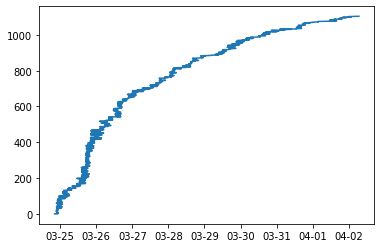

In [149]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

n_votes = len(wyniki)

fig, ax = plt.subplots()
ax.plot(sygnatury,range(n_votes))

ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))

In [150]:
range(n_votes)

range(0, 1105)

## Analiza pytania

---

In [151]:
def count_votes(odpowiedzi):
    """Liczy ilość głosów per odpowiedź."""
    results = {} # odpowiedź: liczba głosów
    
    while len(odpowiedzi): # dopóki pozostały odpowiedzi
        odpowiedz = odpowiedzi[0] # weź pierwszą z brzegu
        n_votes = odpowiedzi.count(odpowiedz) # liczba wystąpień
        results[odpowiedz] = n_votes # zapisz
        # usuń wszystkie wystąpienia odpowiedz
        odpowiedzi = [o for o in odpowiedzi if o != odpowiedz]
    
    return results

## Pytanie 1

---

Podaj najczęstsze odpowiedzi na pytania

In [162]:
def analizuj(n, m=2):
    """Drukuje m najczęstszych odpowiedzi na n-te pytanie."""
    pytanie = headers[n] # nagłówek kolumny
    odpowiedzi = [odp[n] for odp in wyniki] # n-ta kolumna
    votes = count_votes(odpowiedzi) # {odp: liczba głosów}
    # posortuj głosy -> odpowiedzi od najczęstszych
    best = sorted(votes, key=votes.get, reverse=True)
    
    # wyrdukuj pytanie
    print("-"*len(pytanie))
    print(pytanie)
    print("-"*len(pytanie), end="\n\n")
    
    # wydrukuj m najczęstszych odpowiedzi
    for i in range(m):
        odp = best[i] # i-ta odpowiedz
        procent = votes[odp] / n_votes * 100 # procent głosów
        print("{:.2f}% -> {}".format(procent, odp))

In [163]:
analizuj(5)

-------
country
-------

52.04% -> US
14.84% -> IL


In [61]:
# css prezentacji


from IPython.display import display, HTML

s = """

<style>

.rendered_html code {
  font-size: 75%;
}

</style>

"""

display(HTML(s))